In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1ejYqS4KNUpdD60X8RwkLNxrgguU8AqAY'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('CA_WildFires_Modified.csv') 
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

#Grid Search on our dataset with various kernels

In [25]:
#Running grid search for optimal c and gamma values
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
data = pd.read_csv('CA_WildFires_Modified.csv')
X = data.drop('CLASS',axis=1)
X = preprocessing.scale(X)
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
#Define parameter range below
#How to define multi-kernel/multi parameter list
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'scale'],
              'kernel': ['rbf','linear','poly','sigmoid']}  

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print("The best parameters are: ",grid.best_estimator_) 
grid_predictions = grid.predict(X_test) 
print(classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.816, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.814, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.843, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.765, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.804, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.814, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.660, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.676, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] ....... C=0.1, gamma=0.1, kernel=poly, score=0.686, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.1min finished


## An example run of SVM on our dataset and confusion matrix

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.92      0.89      0.90        62

    accuracy                           0.93       161
   macro avg       0.92      0.92      0.92       161
weighted avg       0.93      0.93      0.93       161



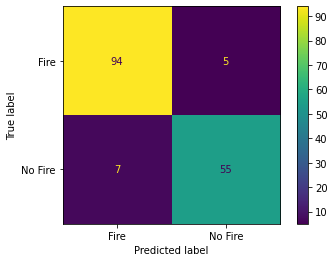

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.svm import SVC

data = pd.read_csv('CA_WildFires_Modified.csv')
X = data.drop('CLASS',axis=1)
X = preprocessing.scale(X)
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22)
svm = SVC(kernel='rbf',C=10,gamma = 1)
svm.fit(X,y)
y_pred = svm.predict(X_test)
labels = ['Fire', 'No Fire']
print(classification_report(y_test, y_pred)) 
plot_confusion_matrix(svm, X_test, y_test,display_labels=labels)
plt.show()


# Trying to plot data and SVM boundries

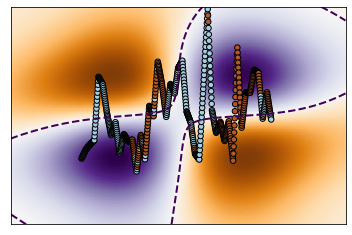

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,plot_confusion_matrix
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
data = pd.read_csv('CA_WildFires_Modified.csv')
X = data.drop('CLASS',axis=1)
X = preprocessing.scale(X)
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
svm = SVC(kernel='rbf',C=10,gamma = 1)
svm.fit(X,y)
y_pred = svm.predict(X_test)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

# Testing random states for training/testing 

In [ ]:
#Find best random_state and work off of that value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
#Replace with your path
data = pd.read_csv('CA_WildFires_Modified.csv')
X = data.drop('CLASS', axis=1)
X = preprocessing.scale(X)
y = data['CLASS']
lim = 101
for i in range(lim):
    #I believe a 70-30 might be a good split
    #random_state = 10x has given me the best results
    #Using Bagging Classifier with SVM
    #Our dataset is small enough so that SVM's computation of O(n_features * n_observation^2) isn't too burdening on our machines.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=i)
    print("Random state is: ",i)
    svm = SVC(kernel='rbf',C=10,gamma = 1)
    model = BaggingClassifier(base_estimator=svm, n_estimators=31)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

Random state is:  0
[[118   5]
 [  4  93]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       123
           1       0.95      0.96      0.95        97

    accuracy                           0.96       220
   macro avg       0.96      0.96      0.96       220
weighted avg       0.96      0.96      0.96       220

Random state is:  1
[[145   6]
 [  1  68]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       151
           1       0.92      0.99      0.95        69

    accuracy                           0.97       220
   macro avg       0.96      0.97      0.96       220
weighted avg       0.97      0.97      0.97       220

Random state is:  2
[[127   6]
 [  6  81]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       133
           1       0.93      0.93      0.93        87

    accuracy                           0.95       220

[[131   7]
 [  4  78]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       138
           1       0.92      0.95      0.93        82

    accuracy                           0.95       220
   macro avg       0.94      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220

Random state is:  24
[[130   8]
 [  2  80]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       138
           1       0.91      0.98      0.94        82

    accuracy                           0.95       220
   macro avg       0.95      0.96      0.95       220
weighted avg       0.96      0.95      0.95       220

Random state is:  25
[[122   6]
 [  1  91]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       128
           1       0.94      0.99      0.96        92

    accuracy                           0.97       220
   macro avg     

[[129   5]
 [  3  83]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       134
           1       0.94      0.97      0.95        86

    accuracy                           0.96       220
   macro avg       0.96      0.96      0.96       220
weighted avg       0.96      0.96      0.96       220

Random state is:  47
[[114   6]
 [  6  94]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       120
           1       0.94      0.94      0.94       100

    accuracy                           0.95       220
   macro avg       0.94      0.94      0.95       220
weighted avg       0.95      0.95      0.95       220

Random state is:  48
[[123   7]
 [  0  90]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       130
           1       0.93      1.00      0.96        90

    accuracy                           0.97       220
   macro avg     

[[132   7]
 [  1  80]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       139
           1       0.92      0.99      0.95        81

    accuracy                           0.96       220
   macro avg       0.96      0.97      0.96       220
weighted avg       0.97      0.96      0.96       220

Random state is:  70
[[123   8]
 [  5  84]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       131
           1       0.91      0.94      0.93        89

    accuracy                           0.94       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220

Random state is:  71
[[127   5]
 [  6  82]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       132
           1       0.94      0.93      0.94        88

    accuracy                           0.95       220
   macro avg     

[[118   7]
 [  6  89]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       125
           1       0.93      0.94      0.93        95

    accuracy                           0.94       220
   macro avg       0.94      0.94      0.94       220
weighted avg       0.94      0.94      0.94       220

Random state is:  93
[[140   5]
 [  1  74]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.94      0.99      0.96        75

    accuracy                           0.97       220
   macro avg       0.96      0.98      0.97       220
weighted avg       0.97      0.97      0.97       220

Random state is:  94
[[126   5]
 [  3  86]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       131
           1       0.95      0.97      0.96        89

    accuracy                           0.96       220
   macro avg     

[[132   9]
 [  6  73]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       141
           1       0.89      0.92      0.91        79

    accuracy                           0.93       220
   macro avg       0.92      0.93      0.93       220
weighted avg       0.93      0.93      0.93       220



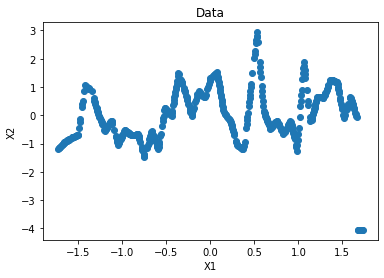

In [ ]:
#Intital Bagging useage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier
#Replace with your path
data = pd.read_csv(r"C:\Users\strai\Desktop\SVM\CA_WildFires_Modified.csv")
X = data.drop('CLASS', axis=1)
X = preprocessing.scale(X)
y = data['CLASS']
#Using Bagging Classifier with SVM
#Our dataset is small enough so that SVM's computation of O(n_features * n_observation^2) isn't too burdening on our machines.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=42)
svm = SVC(kernel='rbf',C=10,gamma = 1)
model = BaggingClassifier(base_estimator=svm, n_estimators=31, random_state=42)
model.fit(X, y)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()